# Clustering

Vamos a realizar operaciones de **clustering** (segmentación) de datos.
La idea es encontrar una estructura dentro de un dataset donde originalmente no la había.
No se tiene un objetivo de predicción (se trata **aprendizaje no supervisado**), sino de uno de entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.

# Parte 1. K-Means con datos sintéticos

Para poder entender como se utilizan los algoritmos de clustering, vamos inicialmente a crear un dataset sintético con datos ficticios que nos permita ilustrar los aspectos de llamado a los métodos de python.

Vamos a generar y visualizar en un plot 300 puntos aleatorios distribuidos alrededor de 4 centros en un espacio bidimensional, con una desviación estándar de 0.7. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

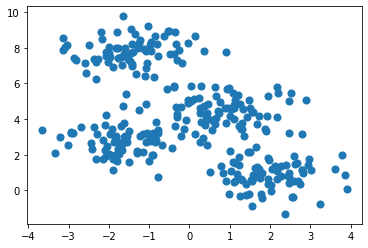

In [42]:
from sklearn.datasets import make_blobs
X, grupo = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

En X van a quedar las coordenadas de los puntos y en **grupo** los clusters originales a los que pertencen los datos.

In [3]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [4]:
grupo[0:5]

array([1, 3, 0, 3, 1])

El algoritmo de K-Means recibe como parámetro el número de clusters que se buscan (hay que sepecificarlo ya que no lo determina automáticamente). Como sabemos que los datos sintéticos se crearon con 4 grupos, vamos a analizar si K-Means los logra detectar.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
grupo_kmeans = kmeans.predict(X)

Vamos a plotear los clusters encontrados con diferentes colores.

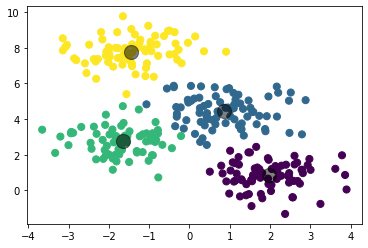

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Ahora comparemos los grupos encontrados con los reales, utilizando una matriz de confusión.

array([[ 0, 75,  0,  0],
       [74,  1,  0,  0],
       [ 0,  3, 72,  0],
       [ 0,  2,  0, 73]], dtype=int64)

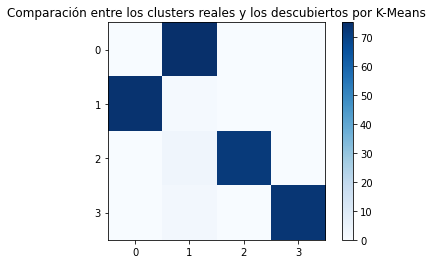

In [7]:
cm = confusion_matrix(grupo, grupo_kmeans)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Comparación entre los clusters reales y los descubiertos por K-Means")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0','1','2','3'])
plt.yticks(tick_marks, ['0','1','2','3'])
cm

En las filas encontramos los grupos reales y en las columnas los de K-Means. Encontramos 6 errores, todos asociados por k-means al grupo 0 cuando eran de alguno de los otros 3 grupos.

Hay que tener en cuenta que el orden de los nombres de los grupos generados puede no conincidir con el orden de los grupos encontrados por K-Means, como es el caso aquí.

Lo que vemos es que parece haber una concordancia entre los clusters encontrados por K-Means y los reales: los grupos 0, 1, 2 y 3 de k-means corresponden a los grupos 1, 0, 2, y 3 encontrados por K-Means, respectivamente.

Vamos a cambiar el orden de los clusters de k-means para poder entender mejor los resultados

In [8]:
traducir = [1, 0, 2, 3]

grupo_kmeans_reorg = []
for g_k, g in zip(grupo_kmeans, grupo):
    grupo_kmeans_reorg.append(traducir[g_k])
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


Podemos hacer esto de una manera mas breve utilizando una de las particularidades de Python: List comprehensions, que permite resumir operaciones simples realizadas dentro de un ciclo:

In [9]:
grupo_kmeans_reorg = [traducir[g_k] for g_k in grupo_kmeans]
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


In [10]:
cm = confusion_matrix(grupo, grupo_kmeans_reorg)
cm

array([[75,  0,  0,  0],
       [ 1, 74,  0,  0],
       [ 3,  0, 72,  0],
       [ 2,  0,  0, 73]], dtype=int64)

In [11]:
accuracy_score(grupo, grupo_kmeans_reorg)

0.98

Veamos gráficamente cuáles son los registros que se asocian a un grupo diferente a su original.

In [12]:
diferentes = []
for (x0, x1), g, gk in zip(X, grupo, grupo_kmeans_reorg):
    if g!=gk:
        diferentes.append([x0, x1])
        

In [13]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [14]:
diferentes = np.array(diferentes)

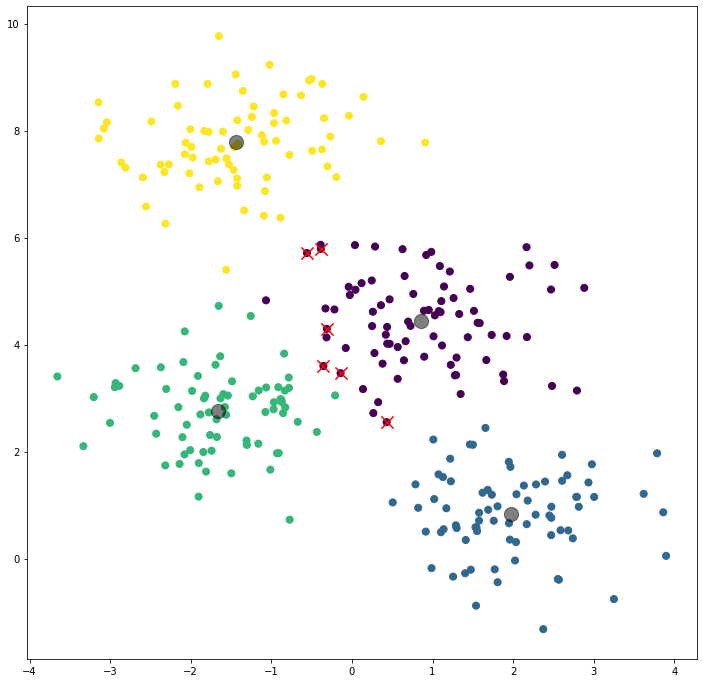

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans_reorg, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(diferentes[:, 0], diferentes[:, 1], c='red', marker="x", s=150)

**Preguntas**:
Comparamos los grupos creados por el clustering con los originales (esto se llama "clasificación no supervisada")
1. Expliquen la primera matriz de confusión obtenida y el por qué fue necesario recodificar los segmentos obtenidos por el clustering.
2. ¿Qué tan bien puede K-Means encontrar las categorías originales en terminos de accuracy?
3. ¿Tiene sentido crear un test set para un clustering?

# Parte 2. K-Means con datos reales

In [145]:
data = pd.read_csv('ComprasClientes.csv', na_values=".")
print(data.shape)
data.head(5)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [146]:
data.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Preparación de los datos

**¿Qué problemas saltan a la vista al inspeccionar los datos? Arréglenlos. **

In [148]:
from sklearn.preprocessing import StandardScaler

In [199]:
numeric_vars = data.loc[:,'Fresh':'Delicassen']
columns = numeric_vars.columns
dataStd = StandardScaler().fit_transform(numeric_vars)
dataStd = pd.DataFrame(dataStd, columns=columns)
dataStd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


## Clustering

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna al dataset**


El método KMeans en scikit-learn permite definir los valores de ciertos parámetros que controlan la ejecución del algoritmo de clustering. Nos interesan particularmente:
- **n_clusters**: número de clusters que se desean (el parámetro "K"). Por defecto es 8.
- **init**: el método de inicialización de los centroides. Por defecto es "k-means++". Otros valores son "random" o un array con los centroides iniciales
- **n_init**: número de inicializaciones diferentes a ensayar para evitar llegar a un óptimo local. Por defecto es 10
- **max_iter**: Máximo número de iteraciones que se esparará para llegar a convergencia. Por defecto es 300.
- **tol**: tolerancia para determinar que se ha llegado o no a convergenia con respecto a la reducción del WSS (interia). Por defecto es 0.0001
- **random_state**: semilla de inicialización del generador pseudo-aleatorio para poder reproducir los resultados.

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

Podemos utilizar el objeto kmeans resultante como modelo de clasificación, al que a través del método *predict* se le puede enviar un dataset para evaluar y obtener los clusters a los que pertenecen.

In [200]:
X = dataStd
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
grupo_kmeans = kmeans.predict(X)

In [204]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


A:\Programar\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


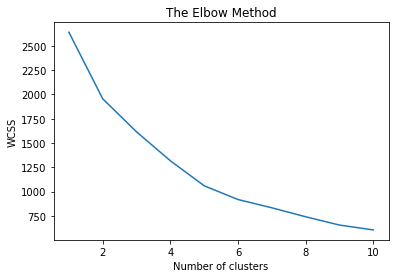

In [202]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5909041986285453
For n_clusters = 3 The average silhouette_score is : 0.5482872649700601
For n_clusters = 4 The average silhouette_score is : 0.34573629344658097
For n_clusters = 5 The average silhouette_score is : 0.36904038268128087
For n_clusters = 6 The average silhouette_score is : 0.37432403986284685


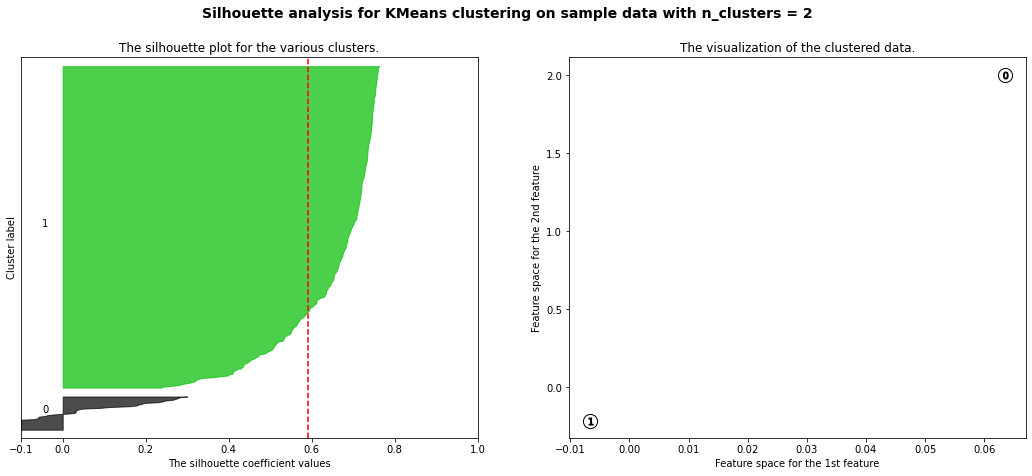

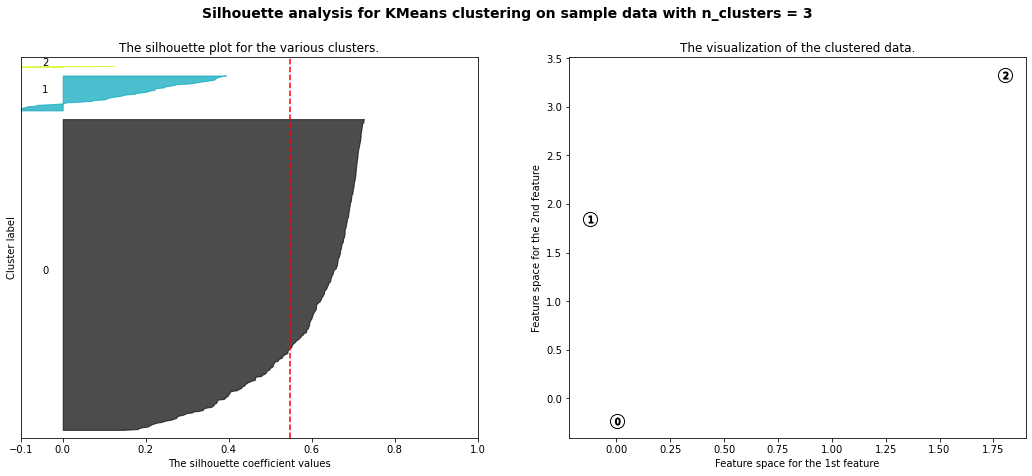

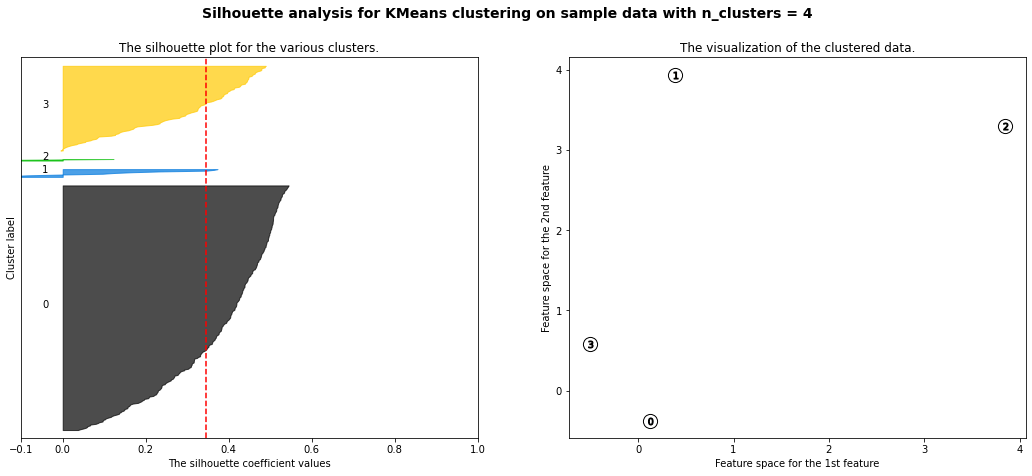

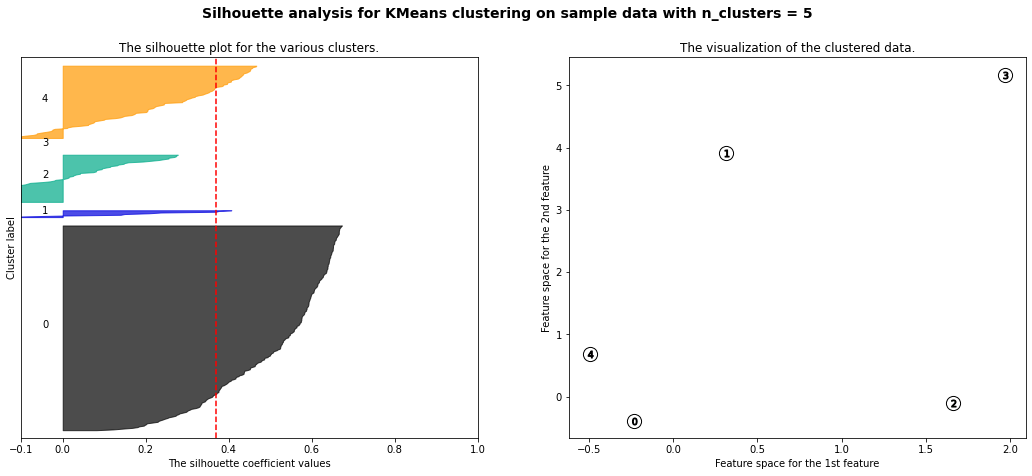

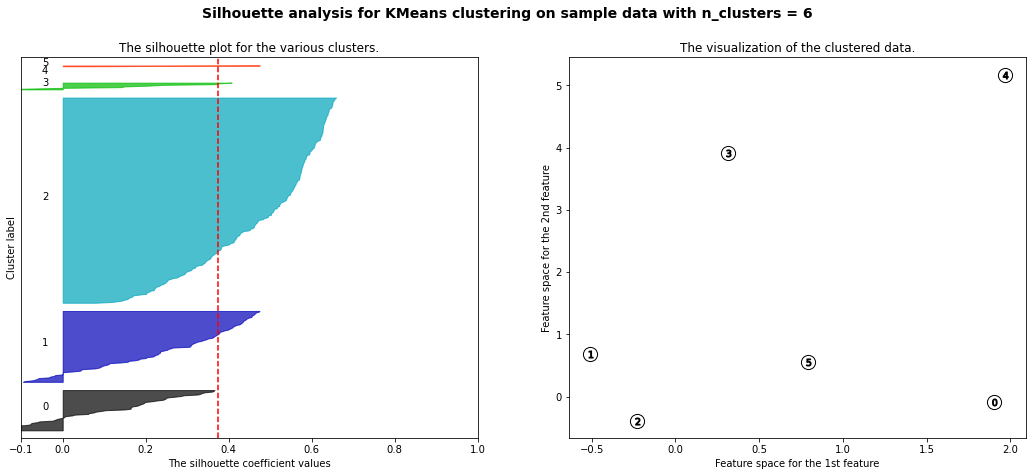

In [205]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [188]:
dataStd['Cluster'] = grupo_kmeans

In [189]:
dataStd.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


<AxesSubplot:xlabel='Delicassen', ylabel='Density'>

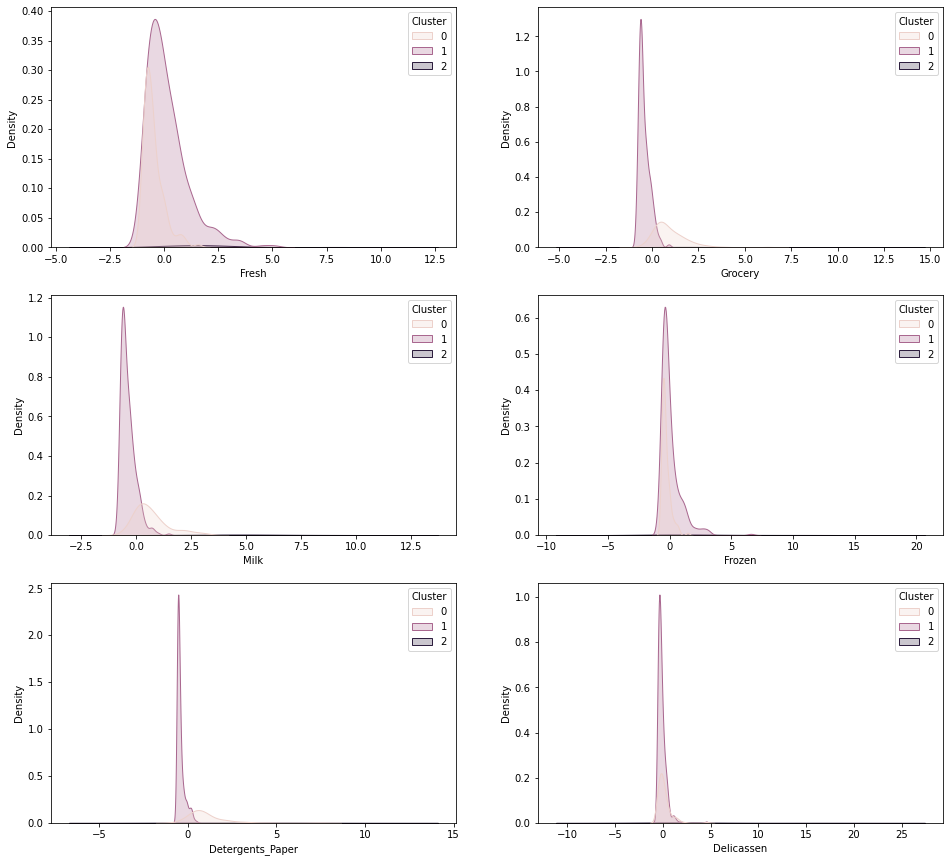

In [190]:
fig, axes = plt.subplots(3, 2, figsize=(16,15))
sns.kdeplot(data = dataStd ,x ='Fresh',hue='Cluster',ax=axes[0,0],fill=True)
sns.kdeplot(data = dataStd ,x ='Milk',hue='Cluster',ax=axes[1,0],fill=True)
sns.kdeplot(data = dataStd ,x ='Grocery',hue='Cluster',ax=axes[0,1],fill=True)
sns.kdeplot(data = dataStd ,x ='Frozen',hue='Cluster',ax=axes[1,1],fill=True)
sns.kdeplot(data = dataStd ,x ='Detergents_Paper',hue='Cluster',ax=axes[2,0],fill=True)
sns.kdeplot(data = dataStd ,x ='Delicassen',hue='Cluster',ax=axes[2,1],fill=True)


<AxesSubplot:xlabel='Delicassen', ylabel='Milk'>

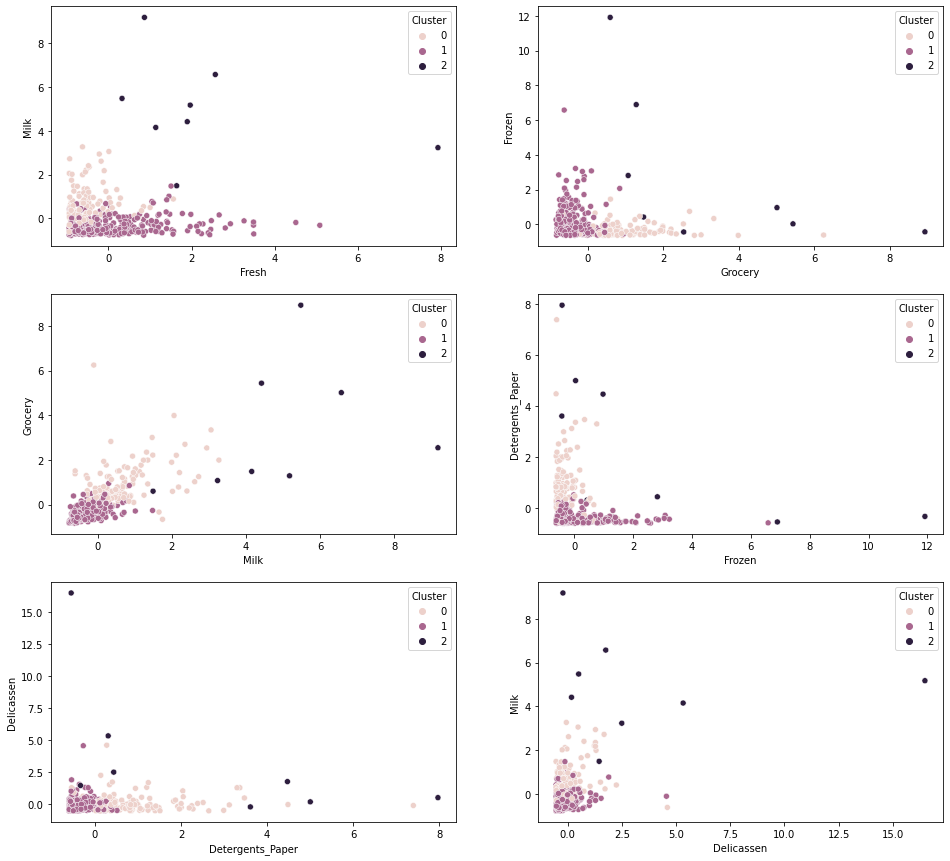

In [191]:
fig, axes = plt.subplots(3, 2, figsize=(16,15))
sns.scatterplot(data = dataStd ,x ='Fresh', y='Milk', hue='Cluster',ax=axes[0,0])
sns.scatterplot(data = dataStd ,x ='Milk', y='Grocery', hue='Cluster',ax=axes[1,0])
sns.scatterplot(data = dataStd ,x ='Grocery', y='Frozen', hue='Cluster',ax=axes[0,1])
sns.scatterplot(data = dataStd ,x ='Frozen', y='Detergents_Paper', hue='Cluster',ax=axes[1,1])
sns.scatterplot(data = dataStd ,x ='Detergents_Paper', y='Delicassen', hue='Cluster',ax=axes[2,0])
sns.scatterplot(data = dataStd ,x ='Delicassen', y='Milk', hue='Cluster',ax=axes[2,1])

In [192]:
numeric_vars = data.loc[:,'Fresh':'Delicassen']
numeric_vars['Cluster'] = dataStd['Cluster']
numeric_vars

C:\Users\Steven\AppData\Local\Temp\ipykernel_8652\1901548234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_vars['Cluster'] = dataStd['Cluster']


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


<AxesSubplot:xlabel='Delicassen', ylabel='Milk'>

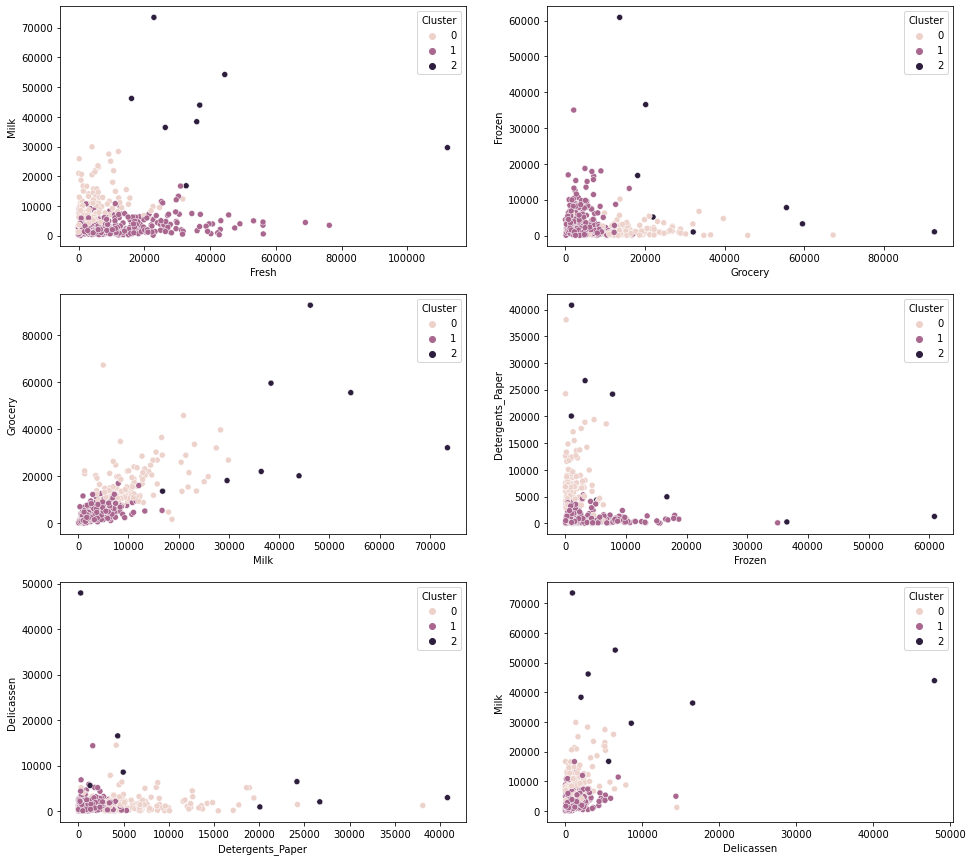

In [193]:
fig, axes = plt.subplots(3, 2, figsize=(16,15))
sns.scatterplot(data = numeric_vars ,x ='Fresh', y='Milk', hue='Cluster',ax=axes[0,0])
sns.scatterplot(data = numeric_vars ,x ='Milk', y='Grocery', hue='Cluster',ax=axes[1,0])
sns.scatterplot(data = numeric_vars ,x ='Grocery', y='Frozen', hue='Cluster',ax=axes[0,1])
sns.scatterplot(data = numeric_vars ,x ='Frozen', y='Detergents_Paper', hue='Cluster',ax=axes[1,1])
sns.scatterplot(data = numeric_vars ,x ='Detergents_Paper', y='Delicassen', hue='Cluster',ax=axes[2,0])
sns.scatterplot(data = numeric_vars ,x ='Delicassen', y='Milk', hue='Cluster',ax=axes[2,1])